<a href="https://colab.research.google.com/github/danielvijill/nrao-nine-2024/blob/main/VLA/VLA_CASA_Imaging_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NRAO NINE 2024

---

# VLA CASA Imaging Tutorial

by [Daniel Argueta Vijil](https://astrohn.wixsite.com/danielvijil)$^1$

$^1$*Universidad Nacional Autónoma de Honduras, Tegucigalpa, Honduras*

In [1]:
from IPython import display

### Accesing the NRAO network

In order to access the NRAO network in the case of the Charlottesville post (cv), we must to open a terminal and introduce the command ```ssh username@ssh.cv.nrao.edu```, this will take us to polaris, a dedicated server where we should avoid running any heavy tasks like casa.



If we wish to process data is is necessary that we work on a cluster node, in order to reserve a node we can type in the console ```ssh cvpost-master```, and then ```nodescheduler -r 5```, this will reserve 1 interactive node for 5 days.

Once your node has been assigned, you will receive an email indicating the node you have been assigned or you can check by writing ```squeue --me``` in the cvpost-master, this should display your assigned node number in the last three digits of the nodelist argument as something like `cvpost000`

After you get your node, you should head to it by running the command `ssh cvpost000` and then initialize a vncserver by simply typing `vncserver`, also you can run the command `vncserver -list` to see your port or session number that looks like a colon followed by a number `:<sessionnumber>`, and in order to kill any session you type `vncserver -kill :<sessionnumber>`.

After you have initialized your vncserver and you know your port number you should exit all existing server connections and in your local OS you should follow a specific procedure to get in. These procedures for MAC and Linux (Ubuntu, although they work in many other distributions) are covered in the radio astrophysics tutorials video series by Erik Carlson on YouTube:

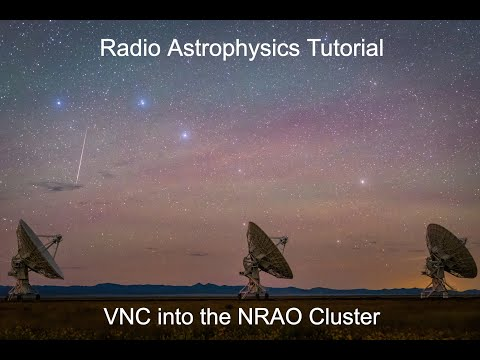

In [3]:
display.YouTubeVideo('B7IR_w1cJ9Q', width=560, height=315)

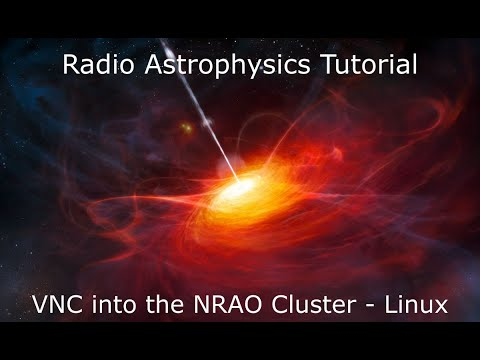

In [2]:
display.YouTubeVideo('yrLpdPOBIZU', width=560, height=315)

[![Watch the video](https://img.youtube.com/vi/)](https://www.youtube.com/watch?v=dQw4w9WgXcQ)


### Moving through file systems

In your console you can use basic linux commands to make your way through folders in your local computer and the lustre file system

```pwd``` will display the current path you are in

```ls``` will display the files and folders in your current location

```ls -l``` will display the files and folders in your current location in the form of a list

```ls -a``` will display the files and folders in your current location including the hidden ones

```cd <foldername>``` will allow you to move to a specific folder

```cd ..``` will allow you to move to the previous folder

```mkdir <foldername>``` will create a new folder

```rm -rf``` will forcefully and recursively remove a file or folder

### Downloading Data

We will be utilizing data taken with the Karl G. Jansky Very Large Array, of a supernova remnant G055.7+3.4. The data were taken on August 23, 2010, in the first D-configuration for which the new wide-band capabilities of the WIDAR (Wideband Interferometric Digital ARchitecture) correlator were available. The 8-hour-long observation includes all available 1 GHz of bandwidth in the L-band, from 1 - 2 GHz in frequency.

All of the detailed references on the procedure can be found [here](https://casaguides.nrao.edu/index.php/VLA_CASA_Imaging-CASA6.5.4)

A copy of the calibrated data (1.2GB) can be downloaded from http://casa.nrao.edu/Data/EVLA/SNRG55/SNR_G55_10s.calib.tar.gz

Your first step will be to unzip and untar the file in a terminal (before you start CASA):

`tar -xzvf  SNR_G55_10s.calib.tar.gz`

### Starting CASA

In order to use the tutorial we should preferrably be working with CASA version 6.5.4, we head to the folder in which the casa.exe file is located and then introduce the command line ```casa --nologger``` in the console.

If you are vnc'd into the NRAO server you might as well just introduce the command `casa -r 6.5.4`

### Getting Familiarized with the Data

The first step is yo make a listobs of the measurement set, this will allow us to obtain more information on what is inside the data

`listobs(vis='SNR_G55_10s.calib.ms', listfile='SNR_G55_10s.calib.ms.listobs')`

This will return a file which you can open in the console and will give an output with key information, among others, some tables that look like this:

| | | | | | | |
|---|---|---|---|---|---|---|
|Fields: | 1 | | | | | |
|  ID  | Code Name       |         RA          |     Decl       |    Epoch  | SrcId   |   nRows |
|  0   | NONE G55.7+3.4      |     19:21:40.000000 |+21.45.00.00000| J2000  | 0     |   1280640 |

| | | | | | | | | | |
|---|---|---|---|---|---|---|---|---|---|
|Spectral Windows: | 4 unique spectral windows | 1 unique polarization setup | | | | |
 | SpwID | Name    |  #Chans |  Frame  | Ch0(MHz) | ChanWid(kHz) | TotBW(kHz) | CtrFreq(MHz) | BBC Num | Corrs |
 | 0   |   Subband:0   |  64 |  TOPO   | 1256.000    |  2000.000   | 128000.0 |  1319.0000    |    4 | RR  LL |
 | 1   |   Subband:2   |  64  | TOPO   | 1384.000   |   2000.000  |  128000.0 |  1447.0000   |     4  | RR  LL |
 | 2    |  Subband:1   |  64  | TOPO   | 1648.000  |    2000.000  |  128000.0 |  1711.0000    |    8  | RR  LL |
 | 3    |  Subband:0   |  64  | TOPO  |  1776.000  |    2000.000   | 128000.0 |  1839.0000    |    8  | RR  LL |

| | | | | |
|---|---|---|---|---|
|Sources: | 4 | | | |
 | ID |  Name        |        SpwId | RestFreq(MHz) | SysVel(km/s) |
 | 0  |  G55.7+3.4     |      0   |  -       |       - |
 | 0  |  G55.7+3.4     |      1   |  -       |       - |
 | 0  |  G55.7+3.4     |      2   |  -       |       - |
 | 0  |  G55.7+3.4     |      3   |  -       |       - |

| | | | | | | | | | | | |
|---|---|---|---|---|---|---|---|---|---|---|---|
| Antennas: |20: | | | | | | | | | |
 | ID  | Name | Station  | Diam.   | Long.  |       Lat.       |         Offset from array center (m)  | |  |            ITRF Geocentric coordinates (m) | | |
 | | | |  | | | East | North | Elevation | x|y|z|                                                            
  | 0   | ea01 | W09    |   25.0 m  | -107.37.25.2 | +33.53.51.0   |    -521.9416  |   -332.7766   |    -1.2001 |-1601710.017000| -5042006.925200 | 3554602.355600 |
  | 1   | ea02 | E02    |   25.0 m  | -107.37.04.4 | +33.54.01.1     |     9.8240    |  -20.4293    |   -2.7806 |-1601150.060300 |-5042000.619800 | 3554860.729400 |
  | 2   | ea03  |E09   |    25.0 m  | -107.36.45.1 | +33.53.53.6     |   506.0564  |   -251.8670   |    -3.5825 |-1600715.950800 |-5042273.187000 | 3554668.184500 |
  | 4 |   ea05 | W08   |    25.0 m |  -107.37.21.6 | +33.53.53.0  |     -432.1167   |  -272.1478    |   -1.5054 |-1601614.091000 |-5042001.652900 | 3554652.509300 |
  |⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|

### Defining Variables

There are some variables you might want to define before running the clean command:



*   `cell_size = '8arcsec'`. The size of the cell, usually recommended to be 3-5 pixels across the synthesized beam size, in this case 46 arcseconds
*   `myvis = 'SNR_G55_10s.calib.ms'`
*   

